In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.metrics import r2_score

import ROOT
from ROOT import TLorentzVector, TVector3

from eval_model import eval_model, eval_plots
from model import Model, Stack, Encoder

Welcome to JupyROOT 6.28/09


In [2]:
training_tag = "U_Test"
L_eval_tag = "L_Test"
R_eval_tag = "R_Test"

in_data_L = "WS_L_Test/datasets_eval"
in_data_R = "WS_R_Test/datasets_eval"

eval_type="down"

In [3]:
in_model_top = "WS_U_Test/training_top_nominal"
if eval_type=="down":
    in_model_quark = "WS_U_40M/training_down_nominal"
if eval_type=="bottom":
    in_model_quark = "WS_U_Test/training_bottom_nominal"

In [4]:
true_top_L, pred_top_L = eval_model(L_eval_tag, in_data_L, in_model_top, "top")
true_top_R, pred_top_R = eval_model(R_eval_tag, in_data_R, in_model_top, "top")

Evaluation Batches:  2215
Evaluation Events:  283520
GPU Available:  True
cuda:0

Test Loss:	 393404.78

Test MAE:	 39.833342063162405
Test RMSE:	 59.71040745844863
Evaluation Batches:  2293
Evaluation Events:  293504
GPU Available:  True
cuda:0

Test Loss:	 349097.25

Test MAE:	 37.84145320455715
Test RMSE:	 56.57601446037961


Plotting predictions...


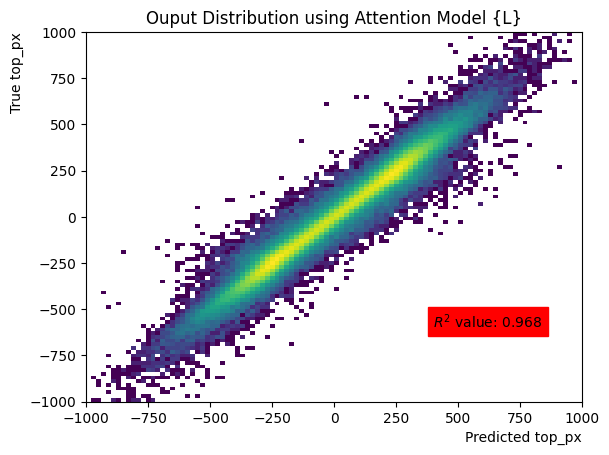

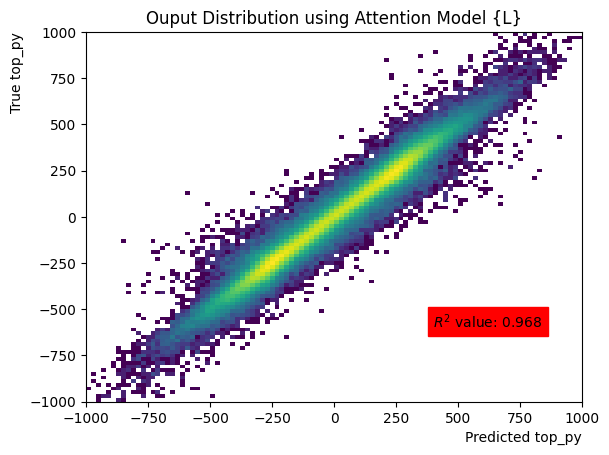

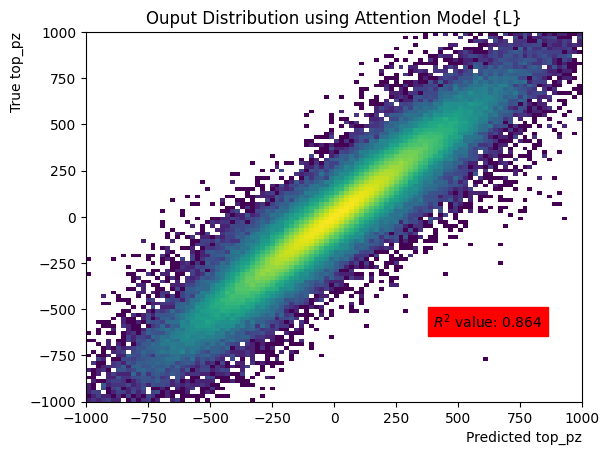

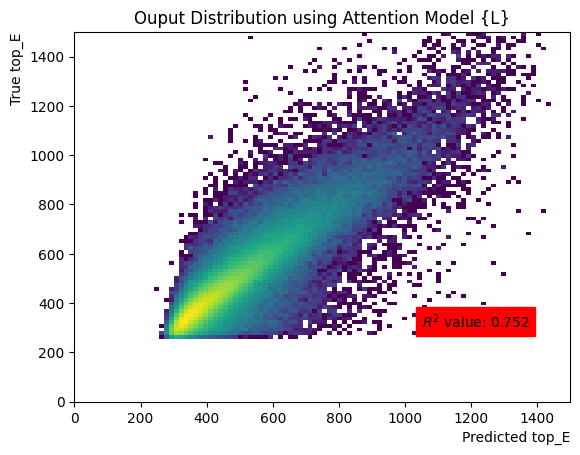

Done Evaluating!
Plotting predictions...


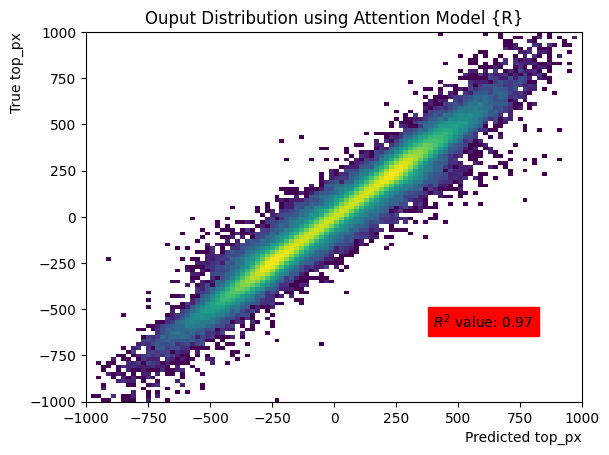

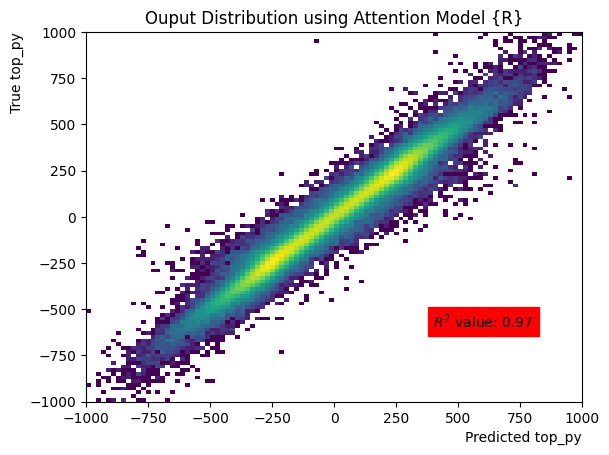

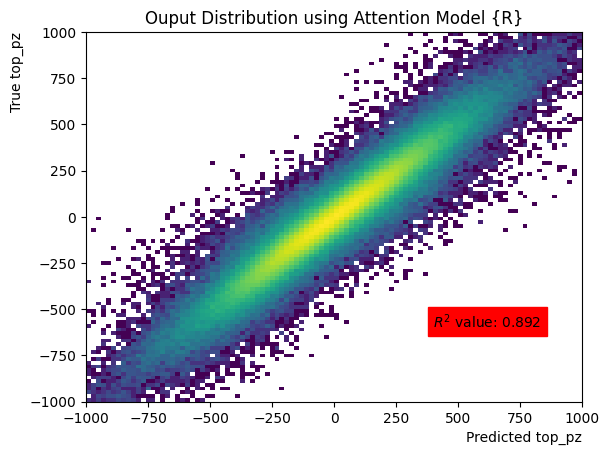

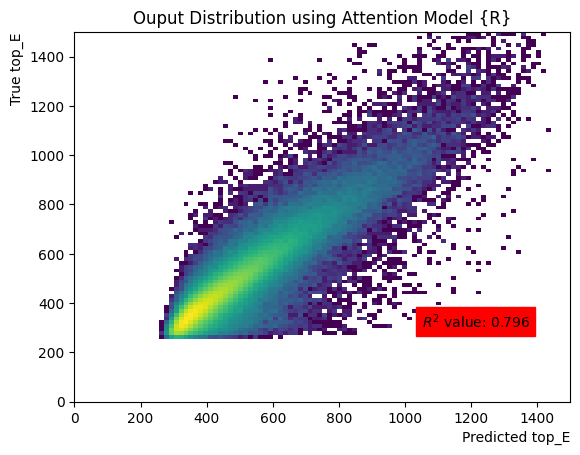

Done Evaluating!


In [5]:
eval_plots("{L}", true_top_L, pred_top_L, "top")
eval_plots("{R}", true_top_R, pred_top_R, "top")

In [6]:
true_quark_L, pred_quark_L = eval_model(L_eval_tag, in_data_L, in_model_quark, eval_type)
true_quark_R, pred_quark_R = eval_model(R_eval_tag, in_data_R, in_model_quark, eval_type)

Evaluation Batches:  2215
Evaluation Events:  283520
GPU Available:  True
cuda:0

Test Loss:	 80.99368

Test MAE:	 0.3192898425075826
Test RMSE:	 0.4228884232720756
Evaluation Batches:  2293
Evaluation Events:  293504
GPU Available:  True
cuda:0

Test Loss:	 83.75192

Test MAE:	 0.3050601105303557
Test RMSE:	 0.406058465399684


Plotting predictions...


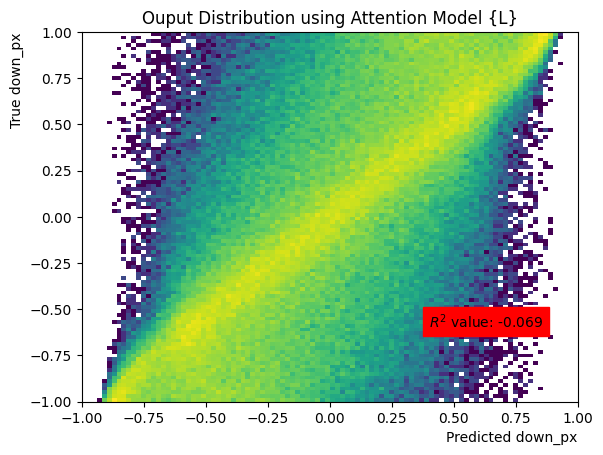

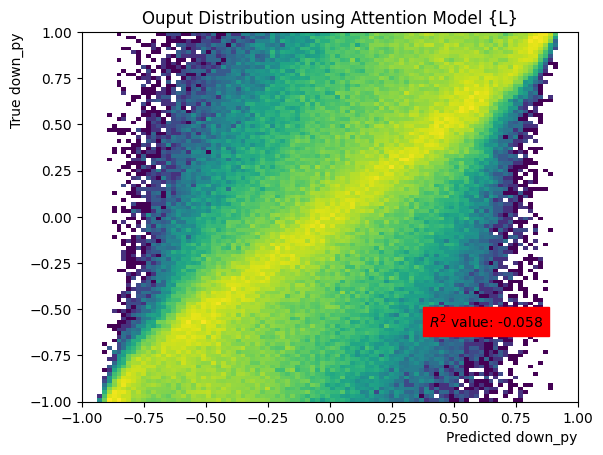

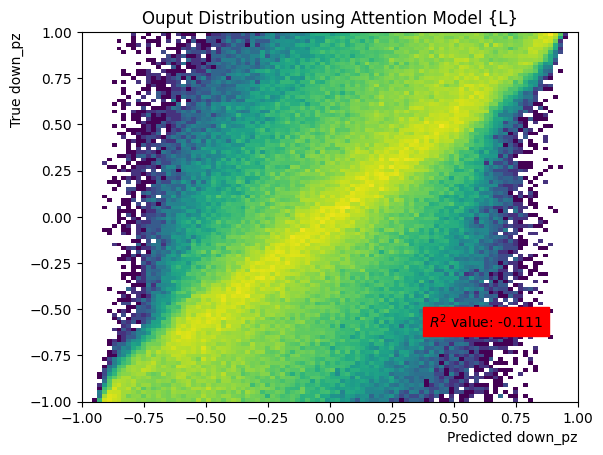

Done Evaluating!
Plotting predictions...


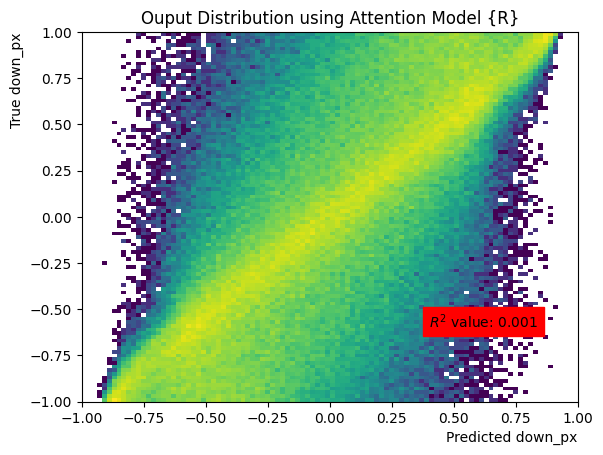

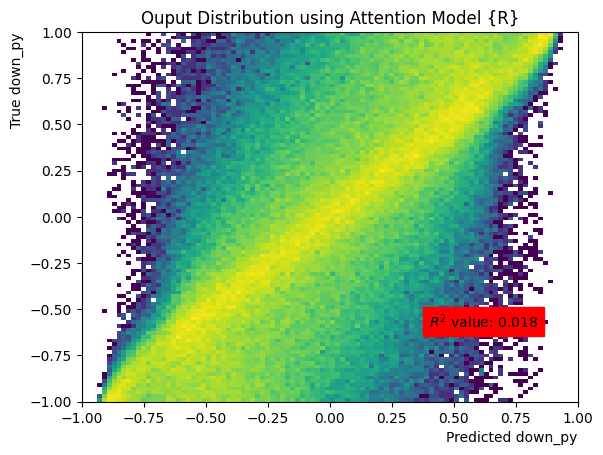

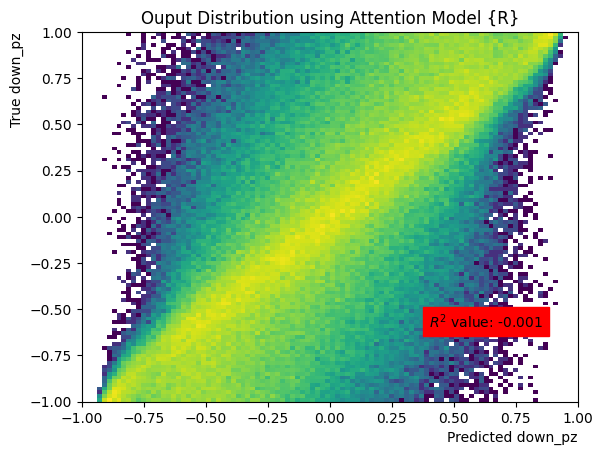

Done Evaluating!


In [7]:
eval_plots("{L}", true_quark_L, pred_quark_L, eval_type)
eval_plots("{R}", true_quark_R, pred_quark_R, eval_type)

In [8]:
cos_theta_true_L=[]
cos_theta_pred_L=[]
events = len(true_top_L)
for event in range(events):
    vec_top_true_L = TLorentzVector(true_top_L[event,0],true_top_L[event,1],true_top_L[event,2],true_top_L[event,3])
    vec_top_pred_L = TLorentzVector(pred_top_L[event,0],pred_top_L[event,1],pred_top_L[event,2],pred_top_L[event,3])
    vec_quark_true_L = TVector3(true_quark_L[event,0],true_quark_L[event,1],true_quark_L[event,2])
    vec_quark_pred_L = TVector3(pred_quark_L[event,0],pred_quark_L[event,1],pred_quark_L[event,2])
    
    vec_top_true_L = vec_top_true_L.Vect().Unit()
    vec_top_pred_L = vec_top_pred_L.Vect().Unit()

    cos_theta_true_L.append(vec_top_true_L.Dot(vec_quark_true_L.Unit()))
    cos_theta_pred_L.append(vec_top_pred_L.Dot(vec_quark_pred_L.Unit()))

In [9]:
cos_theta_true_R=[]
cos_theta_pred_R=[]
events = len(true_top_R)
for event in range(events):
    vec_top_true_R = TLorentzVector(true_top_R[event,0],true_top_R[event,1],true_top_R[event,2],true_top_R[event,3])
    vec_top_pred_R = TLorentzVector(pred_top_R[event,0],pred_top_R[event,1],pred_top_R[event,2],pred_top_R[event,3])
    vec_quark_true_R = TVector3(true_quark_R[event,0],true_quark_R[event,1],true_quark_R[event,2])
    vec_quark_pred_R = TVector3(pred_quark_R[event,0],pred_quark_R[event,1],pred_quark_R[event,2])
    
    vec_top_true_R = vec_top_true_R.Vect().Unit()
    vec_top_pred_R = vec_top_pred_R.Vect().Unit()

    cos_theta_true_R.append(vec_top_true_R.Dot(vec_quark_true_R.Unit()))
    cos_theta_pred_R.append(vec_top_pred_R.Dot(vec_quark_pred_R.Unit()))

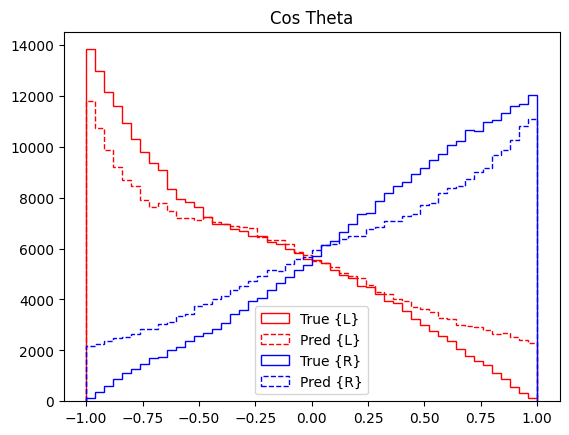

In [10]:
plt.title("Cos Theta")
plt.hist(cos_theta_true_L,histtype='step',bins=50,range=(-1,1),color='r',label='True {L}',linestyle="-")
plt.hist(cos_theta_pred_L,histtype='step',bins=50,range=(-1,1),color='r',label='Pred {L}',linestyle="--")
plt.hist(cos_theta_true_R,histtype='step',bins=50,range=(-1,1),color='b',label='True {R}',linestyle="-")
plt.hist(cos_theta_pred_R,histtype='step',bins=50,range=(-1,1),color='b',label='Pred {R}',linestyle="--")
plt.legend()
plt.show()

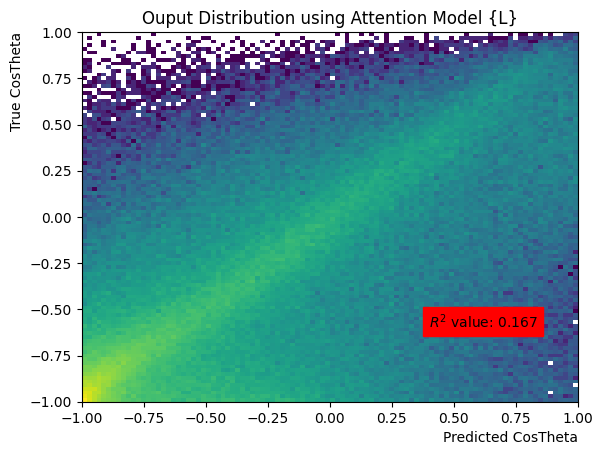

In [11]:
plt.figure()
plt.title("Ouput Distribution using Attention Model {L}")
plt.hist2d(np.array(cos_theta_pred_L),np.array(cos_theta_true_L),bins=100,norm=mcolors.LogNorm(),range=((-1,1),(-1,1)))
plt.xlabel('Predicted CosTheta',loc='right')
plt.ylabel('True CosTheta',loc='top')
plt.text(1-0.3*2,1-0.8*2,"$R^2$ value: "+str(round(r2_score(np.ravel(cos_theta_pred_L),np.ravel(cos_theta_true_L)),3)),backgroundcolor='r',color='k')
#print("R^2 value: ", round(r2_score(cos_theta_pred_L,cos_theta_true_L),3))
#plt.savefig(out_dir+"/pred_2d_"+feats[i]+".png")
plt.show()
plt.close()

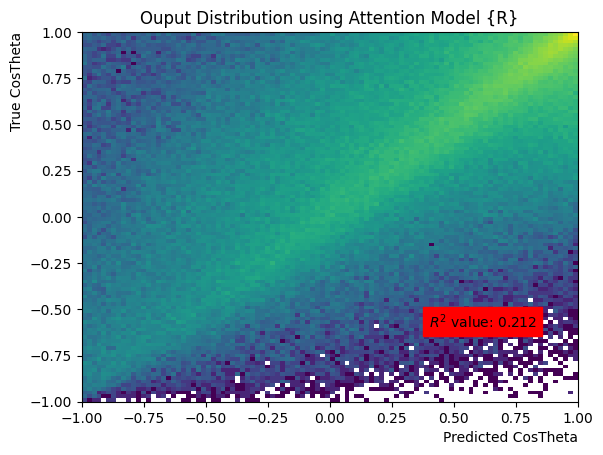

In [12]:
plt.figure()
plt.title("Ouput Distribution using Attention Model {R}")
plt.hist2d(np.array(cos_theta_pred_R),np.array(cos_theta_true_R),bins=100,norm=mcolors.LogNorm(),range=((-1,1),(-1,1)))
plt.xlabel('Predicted CosTheta',loc='right')
plt.ylabel('True CosTheta',loc='top')
plt.text(1-0.3*2,1-0.8*2,"$R^2$ value: "+str(round(r2_score(np.ravel(cos_theta_pred_R),np.ravel(cos_theta_true_R)),3)),backgroundcolor='r',color='k')
#print("R^2 value: ", round(r2_score(cos_theta_pred_R,cos_theta_true_R),3))
#plt.savefig(out_dir+"/pred_2d_"+feats[i]+".png")
plt.show()
plt.close()

In [13]:
norm_true = true_quark_L[:,0]**2+true_quark_L[:,1]**2+true_quark_L[:,2]**2
norm_pred = pred_quark_L[:,0]**2+pred_quark_L[:,1]**2+pred_quark_L[:,2]**2

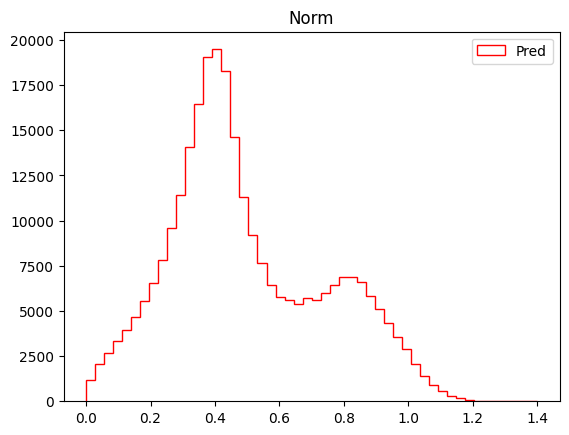

In [14]:
plt.title("Norm")
#plt.hist(norm_true,histtype='step',bins=50,range=(0,1.4),color='k',label='True')
plt.hist(norm_pred,histtype='step',bins=50,range=(0,1.4),color='r',label='Pred')
plt.legend()
plt.show()